<a href="https://colab.research.google.com/github/fringwald/CNN/blob/master/TutorialF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Tutorial MNIST dataset
#Friedemann Ringwald
#1. Augmentation, 2. Hyperparameter adjustment, 3. Change network architecture
# Calculate sensitivity, specificity and accuracy
%pip install tensorflow
%pip install matplotlib

In [2]:
import tensorflow as tf
#x_train contains pictures, y_train contains labels
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


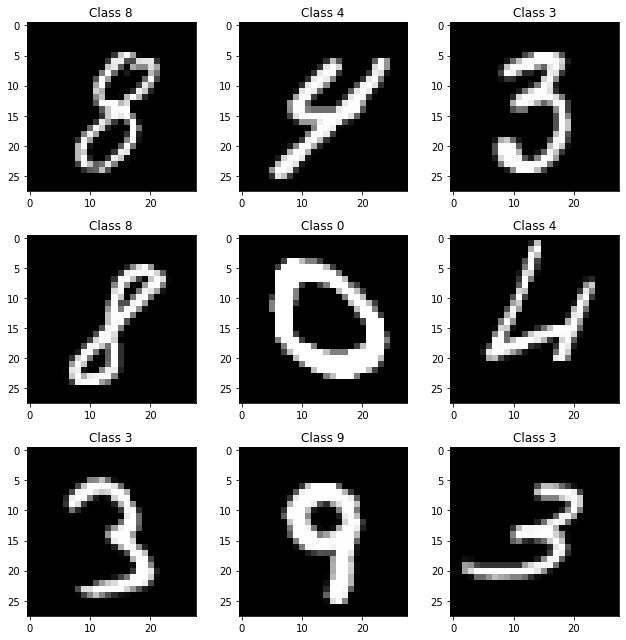

In [3]:
#Show images and classification
import matplotlib.pyplot as plt
import random

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [4]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
input_shape = (28, 28, 1)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Using TensorFlow backend.


In [5]:
#show dimensions
print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


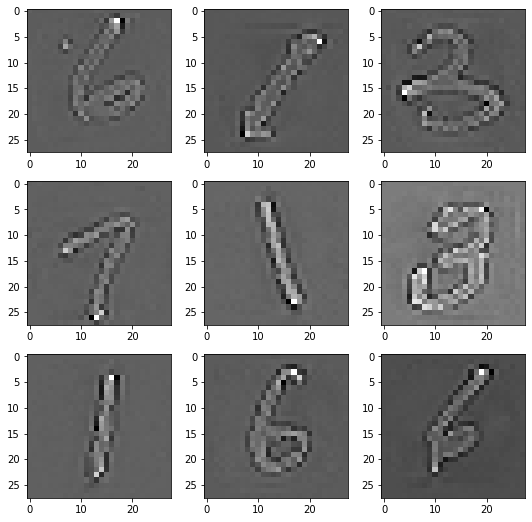

In [6]:
# define data preparation
#zca_whitening=True, Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.
# other possible parameters: rotation_range= 90 -> rotates 90 degrees
datagen = ImageDataGenerator(featurewise_center=True, zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [7]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
#Optimizer, Hyperparameter definition
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [0]:
model.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=6)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/6





60000/60000 [==============================] - 22s 373us/step - loss: 14.4321 - acc: 0.1046
Epoch 2/6
33440/60000 [===============>..............] - ETA: 4s - loss: 14.4070 - acc: 0.1062

In [0]:
model.evaluate(X_test, y_test)